<a href="https://colab.research.google.com/github/dimitramuni/732A92-Text-Mining/blob/main/Sentiment_Classification_Amazon_Fine_Foods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



## Amazon Fine Food Review 

In [ ]:
#using data from http://snap.stanford.edu/data/web-FineFoods.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
#Data Cleaning
with open('/content/drive/MyDrive/Finefood/finefood.txt', encoding='latin-1') as source:
    f=source.read()
    raw_list=f.split('\n\n')
    #creating a dictionary with productID and userID as keys 
    #{('productID','userID'):('profileName','helpfuness','score','time','summary','text')}
    
    my_dict={}
    for row in raw_list:
      #disregaring the row which has more than 8 features
      if(len(row.split('\n'))==8):
        my_dict[row.split('\n')[0].split(': ')[1],row.split('\n')[1].split(': ')[1]]\
        =row.split('\n')[2].split(': ')[1],row.split('\n')[3].split(': ')[1],row.\
        split('\n')[4].split(': ')[1],row.split('\n')[5].split(': ')[1],row.split('\n')[6].\
        split(': ')[1],row.split('\n')[7].split(': ')[1]  
      


    

In [ ]:
FF_k=pd.DataFrame(my_dict.keys(),columns=['productID','userID'])
FF_v=pd.DataFrame.from_dict(my_dict,orient='index',columns=['profileName','helpfulness','score','time','summary','text']).reset_index()
FineFoods=pd.merge(FF_k,FF_v,left_index=True, right_index=True).drop(columns='index')
FineFoods['score']=FineFoods['score'].astype('float')
FineFoods[['summary','text']]=FineFoods[['summary','text']].astype('string')
FineFoods.head()
FineFoods.dtypes



productID       object
userID          object
profileName     object
helpfulness     object
score          float64
time            object
summary         string
text            string
dtype: object

# Dataset Review Score Distribution


5.0    358121
4.0     79514
1.0     51623
3.0     42027
2.0     29512
Name: score, dtype: int64


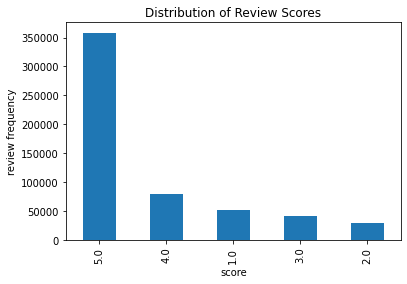

In [ ]:
FineFoods['score'].value_counts().plot(kind='bar',title='Distribution of Review Scores',ylabel='review frequency',xlabel='score')
print(FineFoods['score'].value_counts())


# Length of review text based on the score

Mean word length is the lowest for score 5.


Text(0.5, 1.0, 'Mean Word Length for Review Scores')

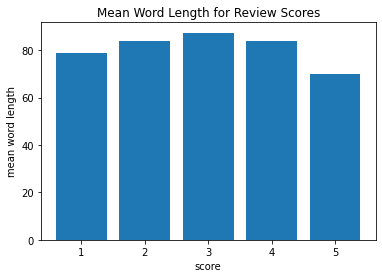

In [ ]:
wordlength=[FineFoods['text'].loc[FineFoods.score==i].apply(lambda x: len(x.split())).mean() for i in range(1,6)]
plt.bar(range(1,6),wordlength)
plt.xlabel('score')
plt.ylabel('mean word length')
plt.title('Mean Word Length for Review Scores')

In [ ]:
FineFoods_Reduced=FineFoods.loc[FineFoods.score!=3]
FineFoods_Reduced['sentiment']=np.select([FineFoods_Reduced.score>3,FineFoods_Reduced.score<3],['positive','negative'])
FineFoods_Reduced['sentiment_binary']=np.select([FineFoods_Reduced.score>3,FineFoods_Reduced.score<3],[1,0])

FineFoods_Reduced.head()
#https://newbedev.com/how-to-use-if-else-in-pandas-dataframe-code-example

<ipython-input-6-6c3de1eb83d3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FineFoods_Reduced['sentiment']=np.select([FineFoods_Reduced.score>3,FineFoods_Reduced.score<3],['positive','negative'])
<ipython-input-6-6c3de1eb83d3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FineFoods_Reduced['sentiment_binary']=np.select([FineFoods_Reduced.score>3,FineFoods_Reduced.score<3],[1,0])


productID          userID                      profileName helpfulness  \
0  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian         1/1   
1  B00813GRG4  A1D87F6ZCVE5NK                           dll pa         0/0   
2  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"         1/1   
3  B000UA0QIQ  A395BORC6FGVXV                             Karl         3/3   
4  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"         0/0   

   score        time                summary  \
0    5.0  1303862400  Good Quality Dog Food   
1    1.0  1346976000      Not as Advertised   
2    4.0  1219017600  "Delight" says it all   
3    2.0  1307923200         Cough Medicine   
4    5.0  1350777600            Great taffy   

                                                text sentiment  \
0  I have bought several of the Vitality canned d...  positive   
1  Product arrived labeled as Jumbo Salted Peanut...  negative   
2  This is a confection that has been around a fe...  positive   
3  If you are looking for the secret ingredient i...  negative   
4  Great taffy at a great price.  There was a wid...  positive   

   sentiment_binary  
0                 1  
1                 0  
2                 1  
3                 0  
4                 1

In [ ]:
FineFoods_Reduced['sentiment'].value_counts()

positive    437635
negative     81135
Name: sentiment, dtype: int64

# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(FineFoods_Reduced['text'],FineFoods_Reduced['sentiment_binary'],test_size=0.3, stratify=FineFoods_Reduced['sentiment'])

In [ ]:
ytrain.value_counts()

1    306344
0     56795
Name: sentiment_binary, dtype: int64

In [ ]:
ytest.value_counts()

1    131291
0     24340
Name: sentiment_binary, dtype: int64

# Undersampling Imbalanced Dataset

In [ ]:
from imblearn.under_sampling import RandomUnderSampler


#FineFoods['score']=FineFoods['score'].astype('string')
Xtemp=np.array(Xtrain).reshape(-1,1)
ytemp=np.array(ytrain).reshape(-1,1)
RuSampler=RandomUnderSampler()
Xtr,ytr=RuSampler.fit_resample(Xtemp,ytemp)


In [ ]:
ytr=np.array(ytr).reshape((-1,1))
ytest=np.array(ytest).reshape((-1,1))

In [ ]:
ytr.shape

(113590, 1)

# Pipeline : Vectorizer, Classifier

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC,SVC


## Using CountVectorizer

### Multinomial Naive Bayes

In [ ]:
alphas=[0.001,0.2, 0.4, 0.6, 0.8, 1]
for alpha in alphas:
  print('\n alpha', alpha)
  pipe1=Pipeline([('cVectorizer',CountVectorizer(encoding='latin-1')),('MNB',MultinomialNB(alpha=alpha))])
  pipe1.fit(Xtr.flatten(),ytr.flatten())
  tr_pred=pipe1.predict(Xtr.flatten())
  print(classification_report(ytr.flatten(),tr_pred))
  te_pred=pipe1.predict(Xtest)
  print(classification_report(ytest.flatten(),te_pred))


 alpha 0.001
              precision    recall  f1-score   support

           0       0.92      0.90      0.91     56795
           1       0.90      0.92      0.91     56795

    accuracy                           0.91    113590
   macro avg       0.91      0.91      0.91    113590
weighted avg       0.91      0.91      0.91    113590

              precision    recall  f1-score   support

           0       0.56      0.86      0.68     24340
           1       0.97      0.88      0.92    131291

    accuracy                           0.87    155631
   macro avg       0.77      0.87      0.80    155631
weighted avg       0.91      0.87      0.88    155631


 alpha 0.2
              precision    recall  f1-score   support

           0       0.91      0.89      0.90     56795
           1       0.89      0.91      0.90     56795

    accuracy                           0.90    113590
   macro avg       0.90      0.90      0.90    113590
weighted avg       0.90      0.90      0.90    1

In [ ]:
ytest

450884    0
181918    1
397300    1
146746    1
426849    1
         ..
407605    1
32757     1
389965    1
413057    0
525164    1
Name: sentiment_binary, Length: 155631, dtype: int64

In [ ]:
tr_pred

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
pipe1=Pipeline([('cVectorizer',CountVectorizer(encoding='latin-1')),('MNB',MultinomialNB()])
pipe1.fit(Xtrain.flatten(),ytrain.flatten())
tr_pred=pipe1.predict(Xtrain.flatten())
print(classification_report(ytrain,tr_pred,target_names=pipe1.classes_))
te_pred=pipe1.predict(Xtest.flatten())
print(classification_report(ytest,te_pred,target_names=pipe1.classes_))

              precision    recall  f1-score   support

    negative       0.90      0.89      0.89     56739
    positive       0.89      0.90      0.89     56850

    accuracy                           0.89    113589
   macro avg       0.89      0.89      0.89    113589
weighted avg       0.89      0.89      0.89    113589

              precision    recall  f1-score   support

    negative       0.88      0.86      0.87     24396
    positive       0.87      0.88      0.87     24285

    accuracy                           0.87     48681
   macro avg       0.87      0.87      0.87     48681
weighted avg       0.87      0.87      0.87     48681



([<matplotlib.patches.Wedge at 0x7f6219c31880>,
 [Text(-0.16843454990458884, 1.0870279676247703, 'negative'),
  Text(0.16843465167949162, -1.0870279518547847, 'positive')])

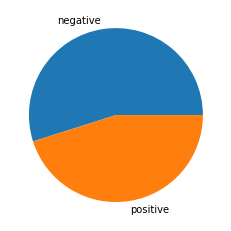

In [ ]:
score3_sentiments=pipe1.predict(FineFoods['text'].loc[FineFoods.score==3])
sentiment,count=np.unique(score3_sentiments,return_counts=True)
plt.pie(count,labels=list(sentiment))


### Logistic Regression Classifier

In [ ]:
pipe2=Pipeline([('cVectorizer',CountVectorizer(encoding='latin-1')),('LgRC',LogisticRegression(max_iter=100000))])
pipe2.fit(Xtrain.flatten(),ytrain.flatten())
tr_pred=pipe2.predict(Xtrain.flatten())
print(classification_report(ytrain,tr_pred,target_names=pipe2.classes_))
te_pred=pipe2.predict(Xtest.flatten())
print(classification_report(ytest,te_pred,target_names=pipe2.classes_))

              precision    recall  f1-score   support

    negative       0.95      0.95      0.95     56788
    positive       0.95      0.95      0.95     56801

    accuracy                           0.95    113589
   macro avg       0.95      0.95      0.95    113589
weighted avg       0.95      0.95      0.95    113589

              precision    recall  f1-score   support

    negative       0.90      0.91      0.91     24347
    positive       0.91      0.90      0.91     24334

    accuracy                           0.91     48681
   macro avg       0.91      0.91      0.91     48681
weighted avg       0.91      0.91      0.91     48681



([<matplotlib.patches.Wedge at 0x7f6219526220>,
 [Text(-0.3180908512549418, 1.0530043733754892, 'negative'),
  Text(0.3180908512549422, -1.053004373375489, 'positive')])

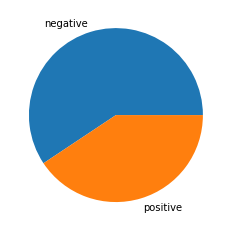

In [ ]:
score3_sentiments=pipe2.predict(FineFoods['text'].loc[FineFoods.score==3])
sentiment,count=np.unique(score3_sentiments,return_counts=True)
plt.pie(count,labels=list(sentiment))


### SVM Classifier

#### Linear Kernel

In [ ]:
pipe3=Pipeline([('cVectorizer',CountVectorizer(encoding='latin-1')),('LnSVC',LinearSVC())])
pipe3.fit(Xtrain.flatten(),ytrain.flatten())
tr_pred=pipe3.predict(Xtrain.flatten())
print(classification_report(ytrain,tr_pred,target_names=pipe3.classes_))
te_pred=pipe3.predict(Xtest.flatten())
print(classification_report(ytest,te_pred,target_names=pipe3.classes_))

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


              precision    recall  f1-score   support

    negative       0.97      0.97      0.97     56788
    positive       0.97      0.97      0.97     56801

    accuracy                           0.97    113589
   macro avg       0.97      0.97      0.97    113589
weighted avg       0.97      0.97      0.97    113589

              precision    recall  f1-score   support

    negative       0.90      0.90      0.90     24347
    positive       0.90      0.89      0.90     24334

    accuracy                           0.90     48681
   macro avg       0.90      0.90      0.90     48681
weighted avg       0.90      0.90      0.90     48681



([<matplotlib.patches.Wedge at 0x7f62191d3070>,
 [Text(-0.2780435075746601, 1.064279948084892, 'negative'),
  Text(0.27804340792957816, -1.0642799741171993, 'positive')])

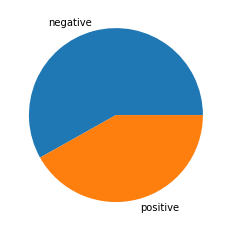

In [ ]:
score3_sentiments=pipe3.predict(FineFoods['text'].loc[FineFoods.score==3])
sentiment,count=np.unique(score3_sentiments,return_counts=True)
plt.pie(count,labels=list(sentiment))

#### Radial Basis Kernel

In [ ]:
pipe4=Pipeline([('cVectorizer',CountVectorizer(encoding='latin-1')),('RBF_SVC',SVC(kernel='rbf',gamma='auto'))])
pipe4.fit(Xtrain.flatten(),ytrain.flatten())
tr_pred=pipe4.predict(Xtrain.flatten())
print(classification_report(ytrain,tr_pred,target_names=pipe4.classes_))
te_pred=pipe4.predict(Xtest.flatten())
print(classification_report(ytest,te_pred,target_names=pipe4.classes_))

#### Polynomial Kernel of Degree 3

In [ ]:
pipe5=Pipeline([('cVectorizer',CountVectorizer(encoding='latin-1')),('RBF_SVC',SVC(kernel='poly',gamma='auto'))])
pipe5.fit(Xtrain.flatten(),ytrain.flatten())
tr_pred=pipe5.predict(Xtrain.flatten())
print(classification_report(ytrain,tr_pred,target_names=pipe5.classes_))
te_pred=pipe5.predict(Xtest.flatten())
print(classification_report(ytest,te_pred,target_names=pipe5.classes_))

## Using Tf-Idf Vectorizer

### Grid Search using Multinomial NB

In [ ]:
alphas=[0.001,0.2, 0.4, 0.6, 0.8, 1]
for alpha in alphas:
  print('\n alpha', alpha)
  pipe1=Pipeline([('TfIdfVectorizer',TfidfVectorizer(encoding='latin-1')),('MNB',MultinomialNB(alpha=alpha))])
  pipe1.fit(Xtr.flatten(),ytr.flatten())
  tr_pred=pipe1.predict(Xtr.flatten())
  print(classification_report(ytr.flatten(),tr_pred))
  te_pred=pipe1.predict(Xtest)
  print(classification_report(ytest.flatten(),te_pred))


 alpha 0.001
              precision    recall  f1-score   support

           0       0.92      0.92      0.92     56795
           1       0.92      0.92      0.92     56795

    accuracy                           0.92    113590
   macro avg       0.92      0.92      0.92    113590
weighted avg       0.92      0.92      0.92    113590

              precision    recall  f1-score   support

           0       0.53      0.86      0.66     24340
           1       0.97      0.86      0.91    131291

    accuracy                           0.86    155631
   macro avg       0.75      0.86      0.79    155631
weighted avg       0.90      0.86      0.87    155631


 alpha 0.2
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     56795
           1       0.91      0.91      0.91     56795

    accuracy                           0.91    113590
   macro avg       0.91      0.91      0.91    113590
weighted avg       0.91      0.91      0.91    1

# Subset Analytics

66057

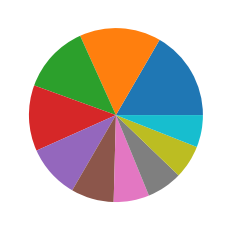

In [ ]:
users=dict(FineFoods['userID'].value_counts())
plt.pie(list(users.values())[:10])
sum(list(users.values())[:2000])

(array([33., 11.,  0.,  1.,  1.,  0.,  2.,  0.,  1.,  1.]),
 array([104. , 135.6, 167.2, 198.8, 230.4, 262. , 293.6, 325.2, 356.8,
        388.4, 420. ]),
 <a list of 10 Patch objects>)

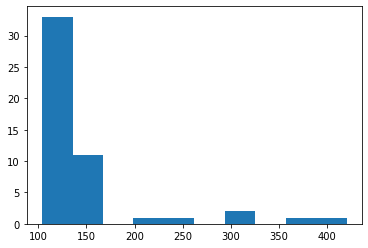

In [ ]:
plt.hist(list(users.values())[:50],)

In [ ]:
a=users.values()
b=np.asarray(tuple(a))
c=np.where(b>50)
c[0].shape

(230,)

In [ ]:
sum(list(users.values())[:2000])/FineFoods.shape[0]

0.11779128632999107

In [ ]:
most_active=dict(FineFoods['userID'].value_counts()[:50]).keys()
user_ids=list(tuple(most_active))

In [ ]:
user_ids[0]

'A3OXHLG6DIBRW8'

In [ ]:
reviews=[FineFoods['text'].loc[FineFoods.userID==id] for id in user_ids]

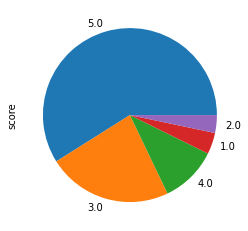

In [ ]:
FineFoods['score'].loc[FineFoods.userID==user_ids[10]].value_counts().plot(kind='pie')

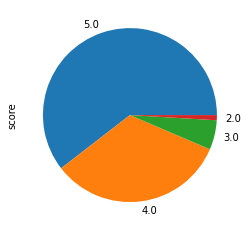

In [ ]:
FineFoods['score'].loc[FineFoods.userID==user_ids[0]].value_counts().plot(kind='pie')

In [ ]:
reviews[0]

In [ ]:
!pip install transformers
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 10.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import torch
import transformers
import shap
import tensorflow as tf

In [ ]:
# load the model and tokenizer
tokenizer = transformers.AutoTokenizer.from_pretrained("nateraw/bert-base-uncased-emotion", use_fast=True)
model = transformers.AutoModelForSequenceClassification.from_pretrained("nateraw/bert-base-uncased-emotion")

# build a pipeline object to do predictions
pred = transformers.pipeline("text-classification", model=model, tokenizer=tokenizer)

In [ ]:
explainer = shap.Explainer(pred)

In [ ]:
shap_values = explainer(Xtrain.iloc[0:3])

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  33%|███▎      | 1/3 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer: 100%|██████████| 3/3 [12:39<00:00, 241.13s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer: 4it [16:04, 321.40s/it]


In [ ]:
ytrain.iloc[0:3]

462124    1
189700    1
358815    1
Name: sentiment_binary, dtype: int64

In [ ]:
shap.plots.text(shap_values)